In [1]:
# Manipulacao dos dados
import pandas as pd
import numpy as np

# Exploracao dos Dados
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats.contingency import crosstab
from scipy import stats

# Importando os dados
from limpeza_dos_dados import df_final

#### Assinalando como DF e removendo colunas.

In [4]:
# Assinalando como df
df = df_final

# Removendo colunas que não serão utilizadas
df = df.drop(columns = ['Faixa_Etaria', 'Ordem_Faixa_Etaria', 'Ordem_Mes', 'Day', 'Month'])

#### Tamanho do dataset

In [34]:
print(len(df))

45211


#### Proporção de clientes convertidos e não convertidos com a campanha

In [35]:
df['Client_Conversion'].value_counts(normalize = True).apply(lambda x: round(x, 3))

No     0.883
Yes    0.117
Name: Client_Conversion, dtype: float64

#### Quantidade de valores NA

In [36]:
df.isna().sum()

Age                  0
Job                  0
Marital_Status       0
Education            0
Default              0
Balance              0
Housing              0
Loan                 0
Contact              0
Duration             0
Campaign             0
Pdays                0
Previous             0
Poutcome             0
Client_Conversion    0
dtype: int64

#### Estatísticas descritivas das variáveis numéricas

In [37]:
print(df.describe().apply(lambda x: round(x, 2)))

            Age    Balance  Duration  Campaign     Pdays  Previous
count  45211.00   45211.00  45211.00  45211.00  45211.00  45211.00
mean      40.94    1362.27    258.16      2.76     41.02      0.58
std       10.62    3044.77    257.53      3.10     99.79      2.30
min       18.00   -8019.00      0.00      1.00      0.00      0.00
25%       33.00      72.00    103.00      1.00      0.00      0.00
50%       39.00     448.00    180.00      2.00      0.00      0.00
75%       48.00    1428.00    319.00      3.00      0.00      0.00
max       95.00  102127.00   4918.00     63.00    871.00    275.00


#### Histograma das variáveis numéricas

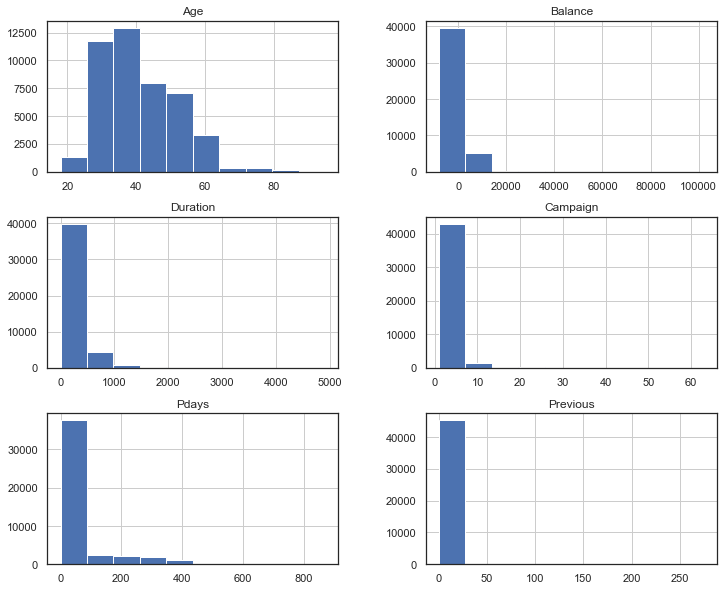

In [38]:
df.hist(figsize = (12, 10));

#### Matriz de correlação das variáveis numéricas

In [39]:
def avaliando_correlacao(dataframe, numeric_only = True):
    
    corr = dataframe.corr(method = 'pearson', min_periods = 1, numeric_only  = numeric_only)
    return corr

corr = avaliando_correlacao(df)
print(corr)

               Age   Balance  Duration  Campaign     Pdays  Previous
Age       1.000000  0.097783 -0.004648  0.004760 -0.023841  0.001288
Balance   0.097783  1.000000  0.021560 -0.014578  0.003330  0.016674
Duration -0.004648  0.021560  1.000000 -0.084570 -0.001584  0.001203
Campaign  0.004760 -0.014578 -0.084570  1.000000 -0.088508 -0.032855
Pdays    -0.023841  0.003330 -0.001584 -0.088508  1.000000  0.454288
Previous  0.001288  0.016674  0.001203 -0.032855  0.454288  1.000000


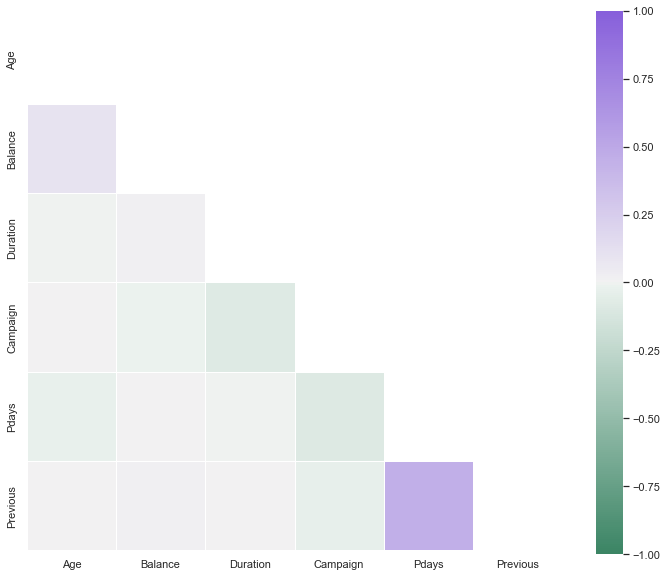

In [40]:
sns.set_theme(style = 'white')

corr = corr
mask = np.triu(np.ones_like(corr, dtype = bool))
f, ax = plt.subplots(figsize = (12, 10))
cmap = sns.diverging_palette(150, 275, as_cmap = True)
sns.heatmap(corr, mask = mask, cmap = cmap, vmax = 1, vmin = -1, center = 0,
            square = True, linewidths = .9)

plt.show();

#### Classe que cria tabela de contingência e faz o cálculo do teste chi2

In [28]:
# Em tabelas de contingência
class AnaliseCategoricas:
    
    def __init__(self, dataframe, classe, var_independente):
        self.dataframe = dataframe
        self.classe = classe
        self.var_independente = var_independente
        self.contingencia_proporcoes = None
        self.tabela = None
        self.pvalor = None
    
    # Criando tabela de contingência
    def criando_tabela_contingencia(self):
        
        self.contingencia_proporcoes = pd.crosstab(self.dataframe[self.classe],
                                              self.dataframe[self.var_independente],
                                              normalize = 'index').apply(lambda x: round(x, 4))
        
        return self.contingencia_proporcoes
    
    # Calculando chi2_squared teste
    def chi2_teste(self):
        
        self.tabela = pd.crosstab(self.dataframe[self.classe], self.dataframe[self.var_independente])
        _, self.pvalor, *_ = chi2_contingency(self.tabela)

        if (self.pvalor < 0.05): 
            return f'O p-valor do teste chi2 é de: {round(self.pvalor, 4)}! Rejeitamos a hipótese nula!'
        else:
            return f'O p-valor do teste chi2 é de: {round(self.pvalor, 4)}! Falhamos em rejeitar a hipótese nula!'

#### Tabela de contingência e teste chi2 das variáveis categóricas

In [41]:
for col in df.columns.tolist():
    if (col == 'Client_Conversion'):
        pass
    elif (df[col].dtype == 'object'):
        analise = AnaliseCategoricas(df, 'Client_Conversion', col)
        print(f'Análise da variável: {col}')
        print(analise.chi2_teste())
        print('-' * 80)
        print(analise.criando_tabela_contingencia())
        print('\n')
    else:
        pass

Análise da variável: Job
O p-valor do teste chi2 é de: 0.0! Rejeitamos a hipótese nula!
--------------------------------------------------------------------------------
Job                 Admin  Blue-Collar  Entrepreneur  Housemaid  Management  \
Client_Conversion                                                             
No                 0.1137       0.2260        0.0342     0.0283      0.2043   
Yes                0.1193       0.1339        0.0233     0.0206      0.2460   

Job                Retired  Self-Employed  Services  Student  Technician  \
Client_Conversion                                                          
No                  0.0438         0.0349    0.0948   0.0168      0.1693   
Yes                 0.0976         0.0354    0.0698   0.0509      0.1588   

Job                Unemployed  Unknown  
Client_Conversion                       
No                     0.0276   0.0064  
Yes                    0.0382   0.0064  


Análise da variável: Marital_Status
O p-val

#### Classe que testa as variáveis numéricas e cria um boxplot

In [22]:
# Avaliando a relação entre variaveis independentes numericas com a classe binária
class AnaliseNumericas:
    
    def __init__(self, dataframe, classe, var_independente):
        self.dataframe = dataframe
        self.classe = classe
        self.var_independente = var_independente

        # Inicializando atributos que serao construindos nos métodos
        self.media_ifyes = None
        self.media_ifno = None
        self.p_kruskal_teste = None

        # Inicianlizando método
        self.obtendo_medias_e_teste()
        
    
    def obtendo_medias_e_teste(self):
    
        # Media dos grupos
        self.media_ifyes = self.dataframe[self.dataframe[self.classe] == 'Yes'][self.var_independente].mean()
        self.media_ifno = self.dataframe[self.dataframe[self.classe] == 'No'][self.var_independente].mean()

        #return f'A média de {self.var_independente} quando a {self.classe} é Yes é: {round(self.media_ifyes, 4)}. Quando a {self.classe} é No é: {round(self.media_ifno, 4)}!'
        
    
    def obtendo_kruskal_teste(self):

        # Teste Kruskal-Wallis
        self.p_kruskal_teste = stats.kruskal(self.dataframe[self.dataframe[self.classe] == 'Yes'][self.var_independente],
                                        self.dataframe[self.dataframe[self.classe] == 'No'][self.var_independente])[1]

        if (self.p_kruskal_teste < 0.05): 
            return f'O p-valor do teste de Kruskal-Wallis é de: {round(self.p_kruskal_teste, 4)}! Rejeitamos a hipótese nula!'
        else:
            return f'O p-valor do teste de Kruskal-Wallis é de: {round(self.p_kruskal_teste, 4)}! Falhamos em rejeitar a hipótese nula!'

        
    def boxplot_plot(self):
        
        fig, ax = plt.subplots(figsize = (8, 4))
    
        ax = sns.boxplot(data = self.dataframe, x = self.var_independente, y = self.classe, orient = 'h', palette = 'Blues')
        fig.suptitle('Boxplot entre: ' + self.var_independente + ' e ' + self.classe, fontsize = 12)

        ax.set_xlabel(self.var_independente)
        ax.set_ylabel('')
        plt.yticks(rotation = 0)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        fig.tight_layout()
        return plt.show()

#### Criação dos testes e boxplot das variáveis numéricas

Análise da variável: Age
--------------------------------------------------------------------------------
A média de Age quando Client_Conversion é Yes é: 41.6701!
A média de Age quando Client_Conversion é No é: 40.839!
O p-valor do teste de Kruskal-Wallis é de: 0.0628! Falhamos em rejeitar a hipótese nula!


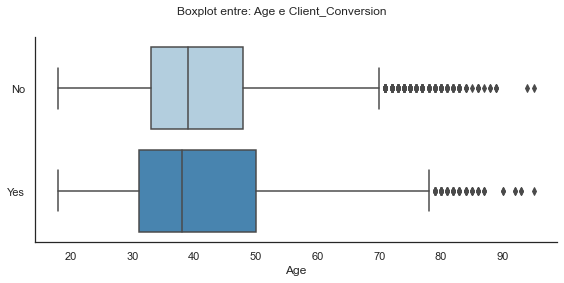



Análise da variável: Balance
--------------------------------------------------------------------------------
A média de Balance quando Client_Conversion é Yes é: 1804.2679!
A média de Balance quando Client_Conversion é No é: 1303.715!
O p-valor do teste de Kruskal-Wallis é de: 0.0! Rejeitamos a hipótese nula!


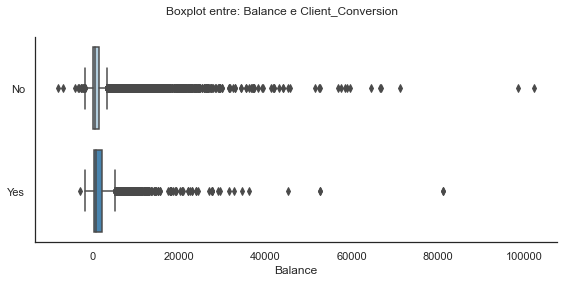



Análise da variável: Duration
--------------------------------------------------------------------------------
A média de Duration quando Client_Conversion é Yes é: 537.2946!
A média de Duration quando Client_Conversion é No é: 221.1828!
O p-valor do teste de Kruskal-Wallis é de: 0.0! Rejeitamos a hipótese nula!


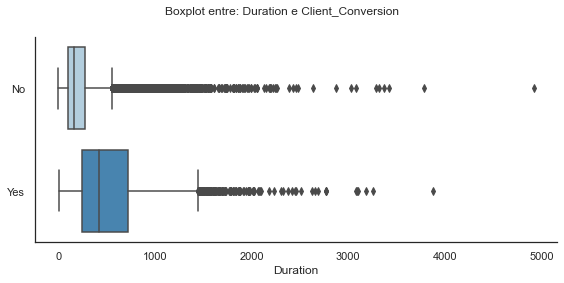



Análise da variável: Campaign
--------------------------------------------------------------------------------
A média de Campaign quando Client_Conversion é Yes é: 2.141!
A média de Campaign quando Client_Conversion é No é: 2.8464!
O p-valor do teste de Kruskal-Wallis é de: 0.0! Rejeitamos a hipótese nula!


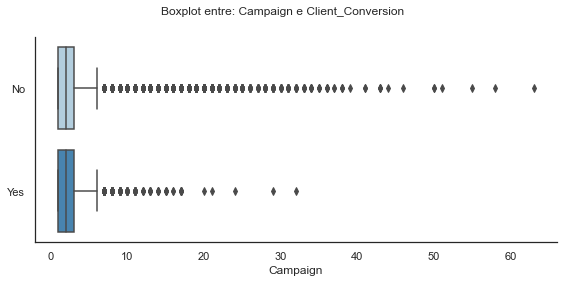



Análise da variável: Pdays
--------------------------------------------------------------------------------
A média de Pdays quando Client_Conversion é Yes é: 69.3428!
A média de Pdays quando Client_Conversion é No é: 37.2623!
O p-valor do teste de Kruskal-Wallis é de: 0.0! Rejeitamos a hipótese nula!


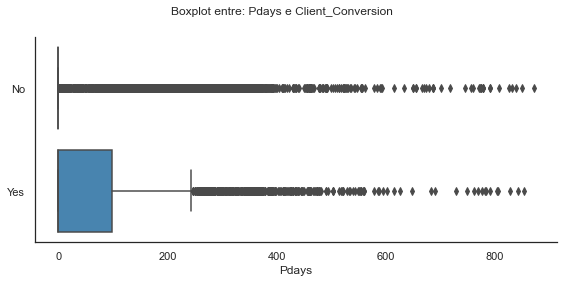



Análise da variável: Previous
--------------------------------------------------------------------------------
A média de Previous quando Client_Conversion é Yes é: 1.1704!
A média de Previous quando Client_Conversion é No é: 0.5022!
O p-valor do teste de Kruskal-Wallis é de: 0.0! Rejeitamos a hipótese nula!


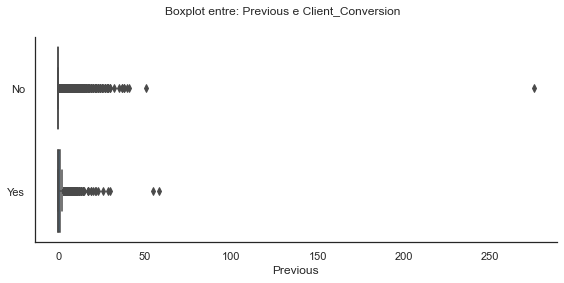

In [42]:
for col in df.columns.tolist():
    if (col == 'Day'):
        pass
    elif df[col].dtype == 'int64':
        print(f'Análise da variável: {col}')
        print('-' * 80)
        analise = AnaliseNumericas(df, 'Client_Conversion', col)
        print(f'A média de {col} quando Client_Conversion é Yes é: {round(analise.media_ifyes, 4)}!')
        print(f'A média de {col} quando Client_Conversion é No é: {round(analise.media_ifno, 4)}!')
        print(analise.obtendo_kruskal_teste())
        analise.boxplot_plot()
        print('\n')
    else:
        pass

# Fim